In [1]:
import numpy as np

from aeon.segmentation import HidalgoSegmenter
from aeon.visualisation.learning_task._segmentation import (
    plot_series_with_change_points,
)
from aeon.visualisation.series._series import plot_series

In [2]:
X = np.random.rand(100, 3)
X[:60, 1:] += 10
X[60:, 1:] = 0

time = np.arange(len(X))

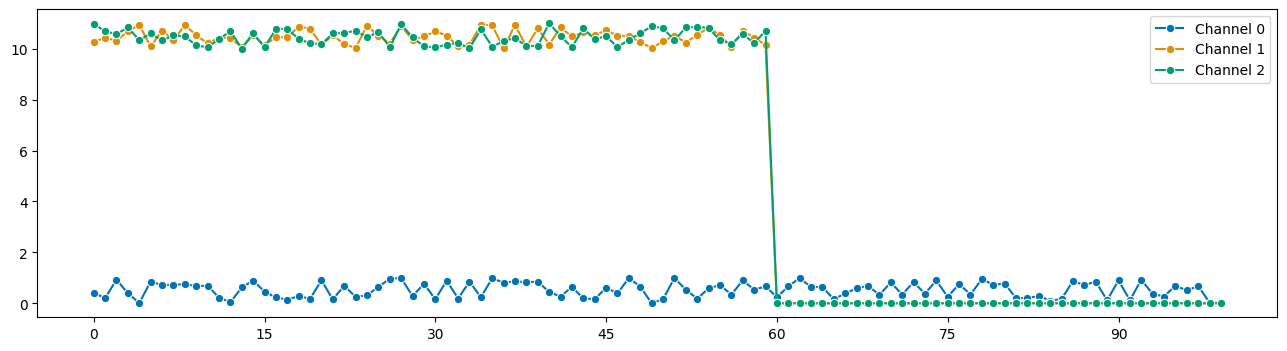

In [3]:
_ = plot_series(X.T, labels=["Channel 0", "Channel 1", "Channel 2"])

In [4]:
hidalgo = HidalgoSegmenter(K=2, q=3, n_iter=2000, burn_in=0.8, seed=10)

labels = hidalgo.fit_predict(X, axis=0)
print("Found change points:", labels)

Found change points: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1 -1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


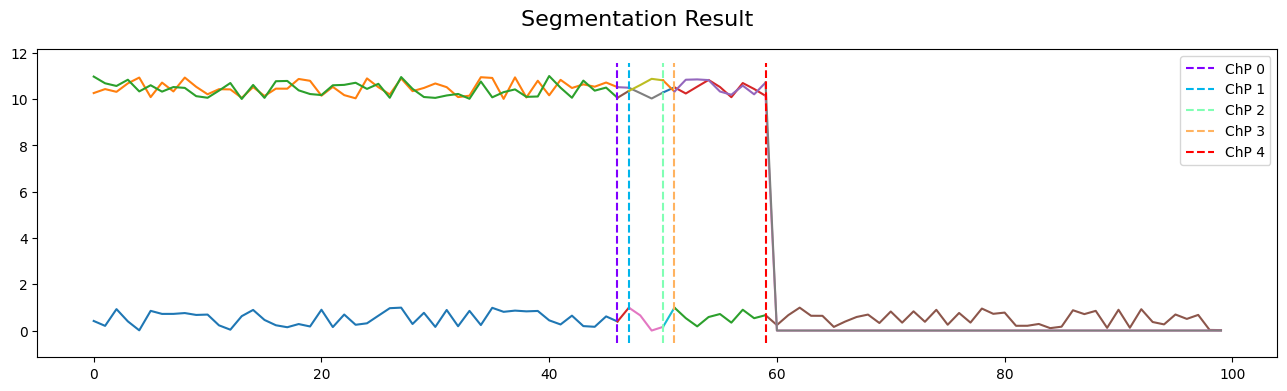

In [5]:
_ = plot_series_with_change_points(
    X, np.where(np.diff(labels) != 0)[0], "Segmentation Result"
)